In [46]:
import pandas as pd
import numpy as np
import seaborn as sns

In [47]:
insurance = pd.read_csv('dados/insurance.csv')
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [48]:
insurance.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [49]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()

columns_to_encode = ['sex', 'smoker', 'region']

for col in columns_to_encode:
    insurance[col] = LE.fit_transform(insurance[col])

print(insurance)

      age  sex     bmi  children  smoker  region      charges
0      19    0  27.900         0       1       3  16884.92400
1      18    1  33.770         1       0       2   1725.55230
2      28    1  33.000         3       0       2   4449.46200
3      33    1  22.705         0       0       1  21984.47061
4      32    1  28.880         0       0       1   3866.85520
...   ...  ...     ...       ...     ...     ...          ...
1333   50    1  30.970         3       0       1  10600.54830
1334   18    0  31.920         0       0       0   2205.98080
1335   18    0  36.850         0       0       2   1629.83350
1336   21    0  25.800         0       0       3   2007.94500
1337   61    0  29.070         0       1       1  29141.36030

[1338 rows x 7 columns]


In [50]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().fit(insurance)
insurance_norm = scaler.transform(insurance)
insurance_norm = pd.DataFrame(insurance_norm)
insurance_norm.describe()
insurance_norm = insurance_norm.rename(columns={0:'age',1:"sex",2:'bmi',3:'children',4:'smoker',5:'region',6:'charges'})
insurance_norm

,age,sex,bmi,children,smoker,region,charges
0,0.021739,0.0,0.321227,0.0,1.0,1.000000,0.251611
1,0.000000,1.0,0.479150,0.2,0.0,0.666667,0.009636
2,0.217391,1.0,0.458434,0.6,0.0,0.666667,0.053115
3,0.326087,1.0,0.181464,0.0,0.0,0.333333,0.333010
4,0.304348,1.0,0.347592,0.0,0.0,0.333333,0.043816
...,...,...,...,...,...,...,...
1333,0.695652,1.0,0.403820,0.6,0.0,0.333333,0.151299
1334,0.000000,0.0,0.429379,0.0,0.0,0.000000,0.017305
1335,0.000000,0.0,0.562012,0.0,0.0,0.666667,0.008108
1336,0.065217,0.0,0.264730,0.0,0.0,1.000000,0.014144


In [51]:
insurance_norm.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000


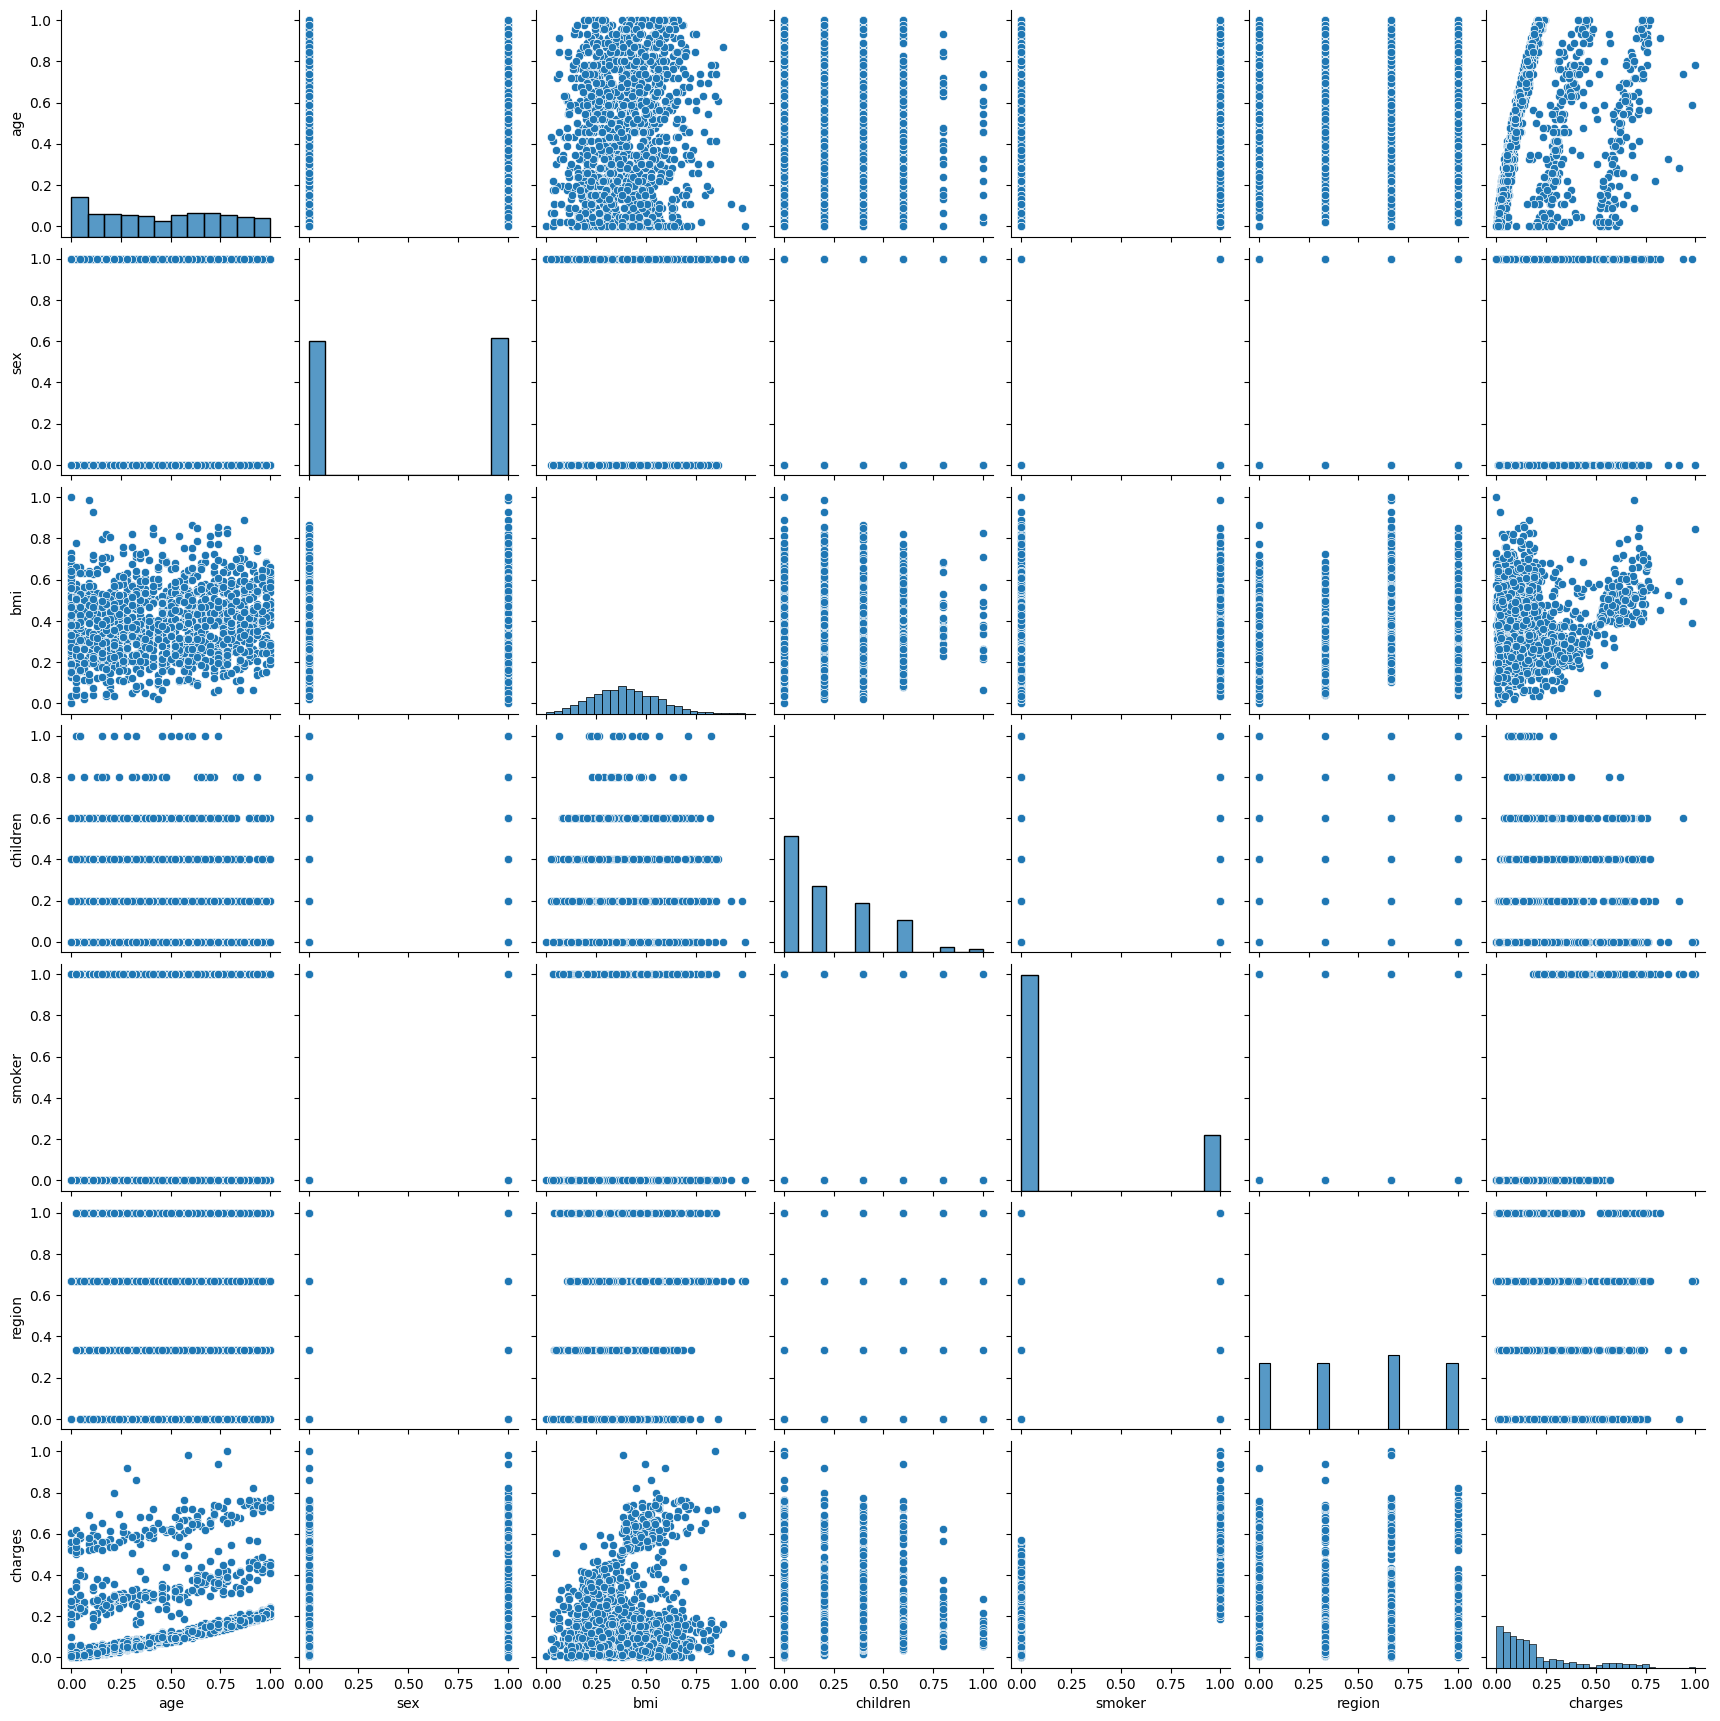

In [52]:
sns.pairplot(insurance_norm)

In [53]:
import statsmodels.formula.api as smf

function = "charges~age+sex+bmi+children+smoker+region"

model = smf.ols(formula=function, data = insurance_norm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     668.1
Date:                Thu, 09 May 2024   Prob (F-statistic):               0.00
Time:                        21:25:08   Log-Likelihood:                 1230.4
No. Observations:                1338   AIC:                            -2447.
Df Residuals:                    1331   BIC:                            -2410.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0479      0.009     -5.419      0.0

In [55]:
function = "charges~age+bmi+children+smoker"

model = smf.ols(formula=function, data = insurance_norm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     998.1
Date:                Thu, 09 May 2024   Prob (F-statistic):               0.00
Time:                        21:25:24   Log-Likelihood:                 1227.6
No. Observations:                1338   AIC:                            -2445.
Df Residuals:                    1333   BIC:                            -2419.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0550      0.008     -6.796      0.0

In [56]:
insurance_norm.dtypes

age         float64
sex         float64
bmi         float64
children    float64
smoker      float64
region      float64
charges     float64
dtype: object

In [57]:
from sklearn.model_selection import train_test_split

X = insurance_norm.drop(columns = ['charges','sex','region'])
Y = insurance_norm['charges']

In [58]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)

In [59]:
from sklearn.linear_model import LinearRegression

LR = LinearRegression()

model = LR.fit(x_train,y_train)

In [60]:
from sklearn.metrics import r2_score

y_predict = LR.predict(x_test)

In [61]:
r2 = r2_score(y_test, y_predict)
r2

0.7626150361064119

In [62]:
age = int(input ('Qual a sua idade?'))
#sex = int(input ('Qual é o seu sexo? (Masculino = 0/ Feminino = 1)'))
bmi = float(input ('Qual o seu índice de massa corporal?'))
children = int(input('Qunatos filhos voce tem? '))
smoker = int(input('Voce fuma (0 = N/1 = S)'))
#region = int(input('Onde vocenasceu nos EUA (0 = southwest/1 = southeast/ 2 = northwest / 3 = northeast)'))

informacoes = [age, bmi, children, smoker]
valor_casa = model.predict([informacoes])
print("O valor do seguro é de US$ {:.2f}".format(valor_casa[0]))

O valor do seguro é de US$ 10.26


C:\Users\l.cavalheiro.CALDICCGN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
